In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm

pd_res = pd.read_csv('../../workdir/results/parse_res.prof')

BASE_MACHINE_NAME = 'kv3'

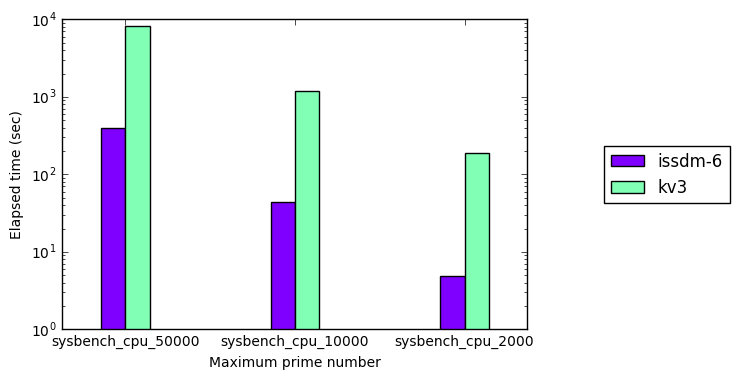

,benchmark,issdm-6,kv3
0,sysbench_cpu_50000,396.4112,8316.7771
1,sysbench_cpu_10000,43.3559,1201.1142
2,sysbench_cpu_2000,4.8234,190.0134


In [2]:
sysbench_cpu = pd_res[pd_res['benchmark'].apply(lambda s: s.startswith('sysbench_cpu'))]

# recreate a new view with benchmarks with all machines
sysbench_cpu_df = pd.DataFrame(data=sysbench_cpu['benchmark'], columns=['benchmark'])
machines = sysbench_cpu['machine'].unique()

for m in machines:
    sysbench_cpu_df[m] = sysbench_cpu[sysbench_cpu['machine'] == m]['result']

sysbench_cpu_df[BASE_MACHINE_NAME] = sysbench_cpu[sysbench_cpu['machine'] == machines[0]]['base_result']
sysbench_cpu_df = sysbench_cpu_df.reset_index(drop=True)

# start to draw figrue
all_machines = machines.tolist() + [BASE_MACHINE_NAME]
names = sysbench_cpu_df['benchmark'].tolist()
values  = [sysbench_cpu_df[m].tolist() for m in all_machines]
colors = cm.rainbow(np.linspace(0, 1, len(values[0])))

pos = np.arange(len(values[0]))
width = 1. / (5 + len(values))

bars = []
fig, ax = plt.subplots()
for idx, (v, color) in enumerate(zip(values, colors)):
    bars.append(ax.bar(left=pos + idx * width, height=v, width=width, color=color))

ax.legend([bars[i] for i in range(len(all_machines))], all_machines, loc='center', bbox_to_anchor=(1.3, 0.5))
ax.set_yscale('log')
ax.margins(.1, None)
ax.set_xticks(pos + width)
ax.set_xticklabels(names)

plt.xlabel('Maximum prime number')
plt.ylabel('Elapsed time (sec)')
plt.show()

sysbench_cpu_df

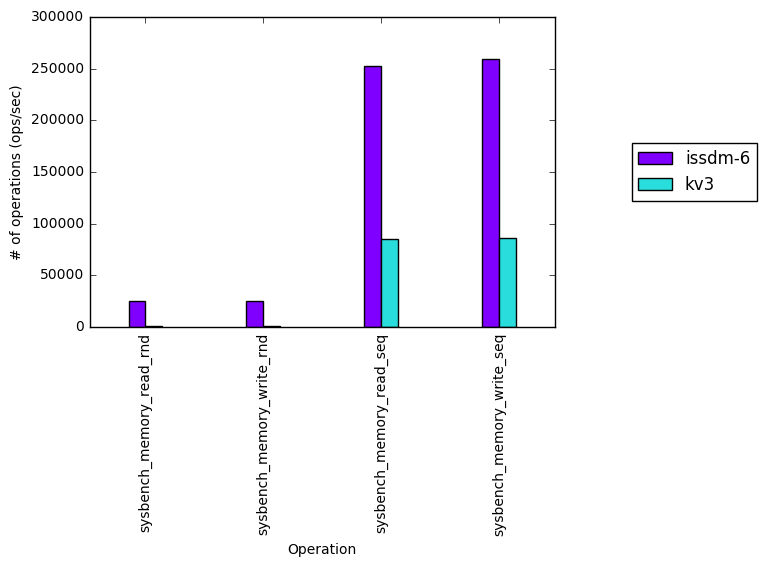

,benchmark,issdm-6,kv3
0,sysbench_memory_read_rnd,25635.77,1118.40
1,sysbench_memory_write_rnd,25161.86,1120.00
2,sysbench_memory_read_seq,252215.59,85281.88
3,sysbench_memory_write_seq,259629.77,85875.72


In [3]:
sysbench_memory = pd_res[pd_res['benchmark'].apply(lambda s: s.startswith('sysbench_memory'))]

# Recreate a new view with benchmarks with all machines
sysbench_memory_df = pd.DataFrame(data=sysbench_memory['benchmark'], columns=['benchmark'])
machines = sysbench_memory['machine'].unique()

for m in machines:
    sysbench_memory_df[m] = sysbench_memory[sysbench_memory['machine'] == m]['result']

sysbench_memory_df[BASE_MACHINE_NAME] = sysbench_memory[sysbench_memory['machine'] == machines[0]]['base_result']
sysbench_memory_df = sysbench_memory_df.reset_index(drop=True)

# start to draw figrue
all_machines = machines.tolist() + [BASE_MACHINE_NAME]
names = sysbench_memory_df['benchmark'].tolist()
values  = [sysbench_memory_df[m].tolist() for m in all_machines]
colors = cm.rainbow(np.linspace(0, 1, len(values[0])))

pos = np.arange(len(values[0]))
width = 1. / (5 + len(values))

bars = []
fig, ax = plt.subplots()
for idx, (v, color) in enumerate(zip(values, colors)):
    bars.append(ax.bar(left=pos + idx * width, height=v, width=width, color=color))

ax.legend([bars[i] for i in range(len(all_machines))], all_machines, loc='center', bbox_to_anchor=(1.3, 0.5))
ax.margins(.1, None)
ax.set_xticks(pos + width)
ax.set_xticklabels(names, rotation='vertical')

plt.xlabel('Operation')
plt.ylabel('# of operations (ops/sec)')
plt.show()

sysbench_memory_df

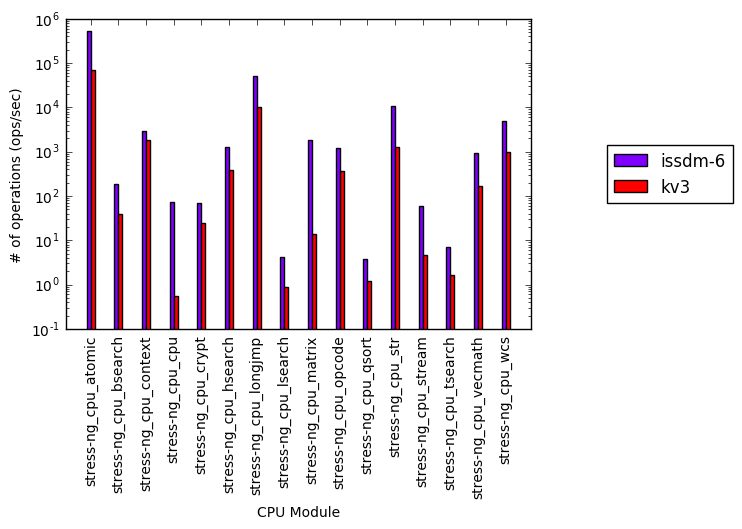

,benchmark,issdm-6,kv3
0,stress-ng_cpu_atomic,526010.582768,69422.195295
1,stress-ng_cpu_bsearch,190.213183,39.296475
2,stress-ng_cpu_context,2943.286650,1871.540427
3,stress-ng_cpu_cpu,72.701074,0.546996
4,stress-ng_cpu_crypt,69.353298,24.445935
5,stress-ng_cpu_hsearch,1251.284964,382.903122
6,stress-ng_cpu_longjmp,50095.215937,9991.356842
7,stress-ng_cpu_lsearch,4.300858,0.900031
8,stress-ng_cpu_matrix,1839.212148,13.800465
9,stress-ng_cpu_opcode,1242.644571,364.400400


In [4]:
stress_ng_cpu = pd_res[pd_res['benchmark'].apply(lambda s: s.startswith('stress-ng_cpu'))]

# Recreate a new view with benchmarks with all machines
stress_ng_cpu_df = pd.DataFrame(data=stress_ng_cpu['benchmark'], columns=['benchmark'])
machines = stress_ng_cpu['machine'].unique()

for m in machines:
    stress_ng_cpu_df[m] = stress_ng_cpu[stress_ng_cpu['machine'] == m]['result']

stress_ng_cpu_df[BASE_MACHINE_NAME] = stress_ng_cpu[stress_ng_cpu['machine'] == machines[0]]['base_result']
stress_ng_cpu_df = stress_ng_cpu_df.reset_index(drop=True)

# start to draw figrue
all_machines = machines.tolist() + [BASE_MACHINE_NAME]
names = stress_ng_cpu_df['benchmark'].tolist()
values  = [stress_ng_cpu_df[m].tolist() for m in all_machines]
colors = cm.rainbow(np.linspace(0, 20, len(values[0])))

pos = np.arange(len(values[0]))
width = 1. / (5 + len(values))

bars = []
fig, ax = plt.subplots()
for idx, (v, color) in enumerate(zip(values, colors)):
    bars.append(ax.bar(left=pos + idx * width, height=v, width=width, color=color))

ax.legend([bars[i] for i in range(len(all_machines))], all_machines, loc='center', bbox_to_anchor=(1.3, 0.5))
ax.set_yscale('log')
ax.margins(.05, None)
ax.set_xticks(pos + width)
ax.set_xticklabels(names, rotation='vertical')

plt.xlabel('CPU Module')
plt.ylabel('# of operations (ops/sec)')
plt.show()

stress_ng_cpu_df

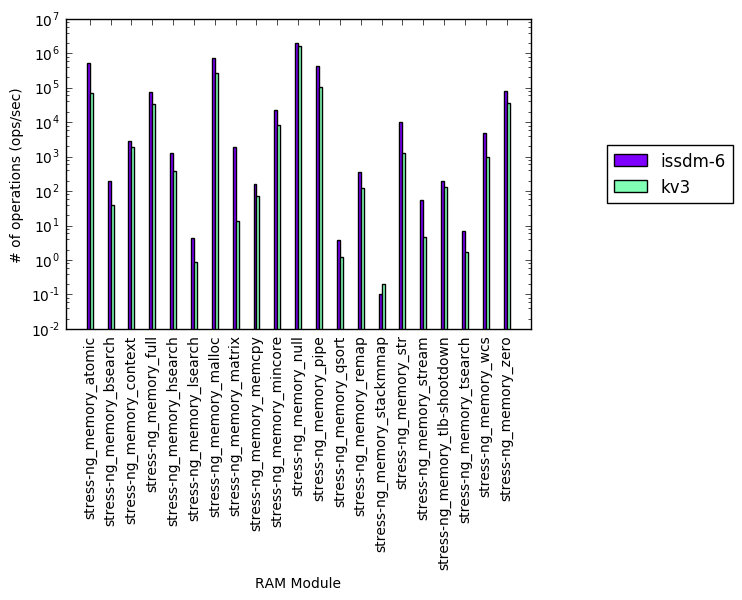

,benchmark,issdm-6,kv3
0,stress-ng_memory_atomic,5.258340e+05,6.959862e+04
1,stress-ng_memory_bsearch,1.917626e+02,3.931073e+01
2,stress-ng_memory_context,2.941358e+03,1.886341e+03
3,stress-ng_memory_full,7.357224e+04,3.352275e+04
4,stress-ng_memory_hsearch,1.248893e+03,3.809976e+02
5,stress-ng_memory_lsearch,4.300935e+00,9.000210e-01
6,stress-ng_memory_malloc,7.204272e+05,2.774019e+05
7,stress-ng_memory_matrix,1.844206e+03,1.380046e+01
8,stress-ng_memory_memcpy,1.650099e+02,7.148579e+01
9,stress-ng_memory_mincore,2.218749e+04,8.149092e+03


In [5]:
stress_ng_memory = pd_res[pd_res['benchmark'].apply(lambda s: s.startswith('stress-ng_memory'))]

# Recreate a new view with benchmarks with all machines
stress_ng_memory_df = pd.DataFrame(data=stress_ng_memory['benchmark'], columns=['benchmark'])
machines = stress_ng_memory['machine'].unique()

for m in machines:
    stress_ng_memory_df[m] = stress_ng_memory[stress_ng_memory['machine'] == m]['result']

stress_ng_memory_df[BASE_MACHINE_NAME] = stress_ng_memory[stress_ng_memory['machine'] == machines[0]]['base_result']
stress_ng_memory_df = stress_ng_memory_df.reset_index(drop=True)

# start to draw figrue
all_machines = machines.tolist() + [BASE_MACHINE_NAME]
names = stress_ng_memory_df['benchmark'].tolist()
values  = [stress_ng_memory_df[m].tolist() for m in all_machines]
colors = cm.rainbow(np.linspace(0, 10, len(values[0])))

pos = np.arange(len(values[0]))
width = 1. / (5 + len(values))

bars = []
fig, ax = plt.subplots()
for idx, (v, color) in enumerate(zip(values, colors)):
    bars.append(ax.bar(left=pos + idx * width, height=v, width=width, color=color))

ax.legend([bars[i] for i in range(len(all_machines))], all_machines, loc='center', bbox_to_anchor=(1.3, 0.5))
ax.set_yscale('log')
ax.margins(.05, None)
ax.set_xticks(pos + width)
ax.set_xticklabels(names, rotation='vertical')

plt.xlabel('RAM Module')
plt.ylabel('# of operations (ops/sec)')
plt.show()

stress_ng_memory_df

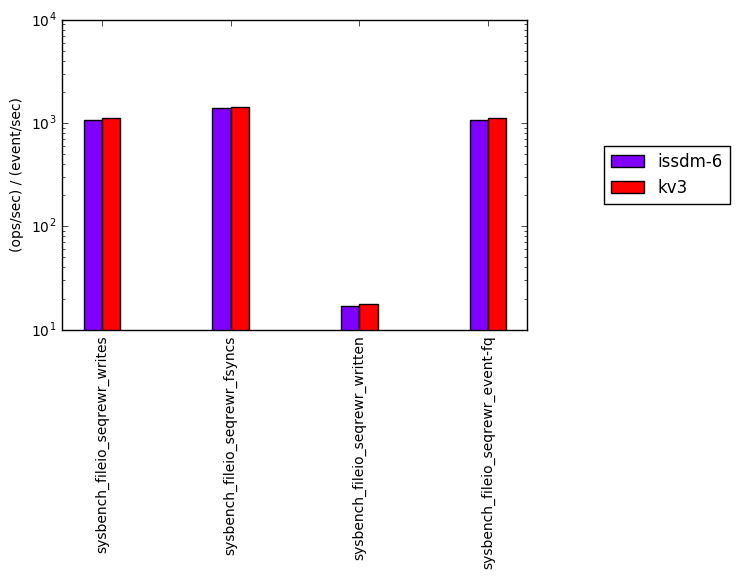

,benchmark,issdm-6,kv3
0,sysbench_fileio_seqrewr_writes,1080.1800,1124.6700
1,sysbench_fileio_seqrewr_fsyncs,1382.6300,1439.5700
2,sysbench_fileio_seqrewr_written,16.8800,17.5700
3,sysbench_fileio_seqrewr_event-fq,1080.1819,1124.6696


In [6]:
sysbench_fileio = pd_res[pd_res['benchmark'].apply(lambda s: s.startswith('sysbench_fileio'))]

# Recreate a new view with benchmarks with all machines
sysbench_fileio_df = pd.DataFrame(data=sysbench_fileio['benchmark'], columns=['benchmark'])
machines = sysbench_fileio['machine'].unique()

for m in machines:
    sysbench_fileio_df[m] = sysbench_fileio[sysbench_fileio['machine'] == m]['result']

sysbench_fileio_df[BASE_MACHINE_NAME] = sysbench_fileio[sysbench_fileio['machine'] == machines[0]]['base_result']
sysbench_fileio_df = sysbench_fileio_df.reset_index(drop=True)

# start to draw figrue
all_machines = machines.tolist() + [BASE_MACHINE_NAME]
names = sysbench_fileio_df['benchmark'].tolist()
values  = [sysbench_fileio_df[m].tolist() for m in all_machines]
colors = cm.rainbow(np.linspace(0, 5, len(values[0])))

pos = np.arange(len(values[0]))
width = 1. / (5 + len(values))

bars = []
fig, ax = plt.subplots()
for idx, (v, color) in enumerate(zip(values, colors)):
    bars.append(ax.bar(left=pos + idx * width, height=v, width=width, color=color))

ax.legend([bars[i] for i in range(len(all_machines))], all_machines, loc='center', bbox_to_anchor=(1.3, 0.5))
ax.set_yscale('log')
ax.margins(.05, None)
ax.set_xticks(pos + width)
ax.set_xticklabels(names, rotation='vertical')

plt.ylabel('(ops/sec) / (event/sec)')
plt.show()

sysbench_fileio_df

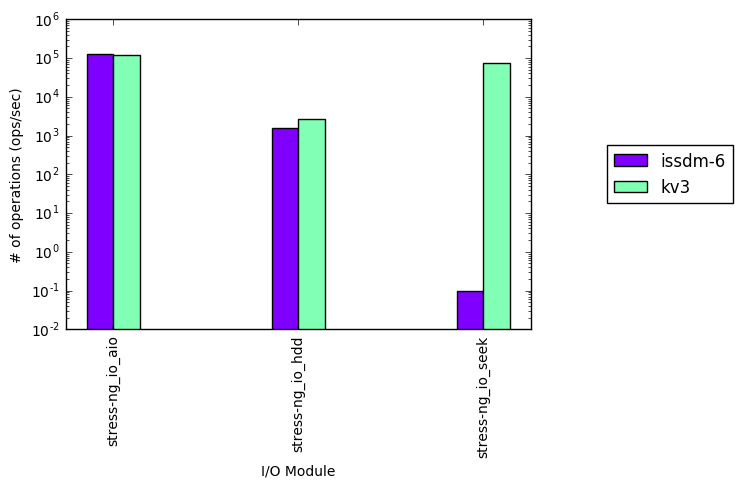

,benchmark,issdm-6,kv3
0,stress-ng_io_aio,125560.601509,120586.597859
1,stress-ng_io_hdd,1517.260705,2700.304446
2,stress-ng_io_seek,0.099935,75622.045153


In [7]:
stress_ng_io = pd_res[pd_res['benchmark'].apply(lambda s: s.startswith('stress-ng_io'))]

# Recreate a new view with benchmarks with all machines
stress_ng_io_df = pd.DataFrame(data=stress_ng_io['benchmark'], columns=['benchmark'])
machines = stress_ng_io['machine'].unique()

for m in machines:
    stress_ng_io_df[m] = stress_ng_io[stress_ng_io['machine'] == m]['result']

stress_ng_io_df[BASE_MACHINE_NAME] = stress_ng_io[stress_ng_io['machine'] == machines[0]]['base_result']
stress_ng_io_df = stress_ng_io_df.reset_index(drop=True)

# start to draw figrue
all_machines = machines.tolist() + [BASE_MACHINE_NAME]
names = stress_ng_io_df['benchmark'].tolist()
values  = [stress_ng_io_df[m].tolist() for m in all_machines]
colors = cm.rainbow(np.linspace(0, 1, len(values[0])))

pos = np.arange(len(values[0]))
width = 1. / (5 + len(values))

bars = []
fig, ax = plt.subplots()
for idx, (v, color) in enumerate(zip(values, colors)):
    bars.append(ax.bar(left=pos + idx * width, height=v, width=width, color=color))

ax.legend([bars[i] for i in range(len(all_machines))], all_machines, loc='center', bbox_to_anchor=(1.3, 0.5))
ax.set_yscale('log')
ax.margins(.05, None)
ax.set_xticks(pos + width)
ax.set_xticklabels(names, rotation='vertical')

plt.xlabel('I/O Module')
plt.ylabel('# of operations (ops/sec)')
plt.show()

stress_ng_io_df

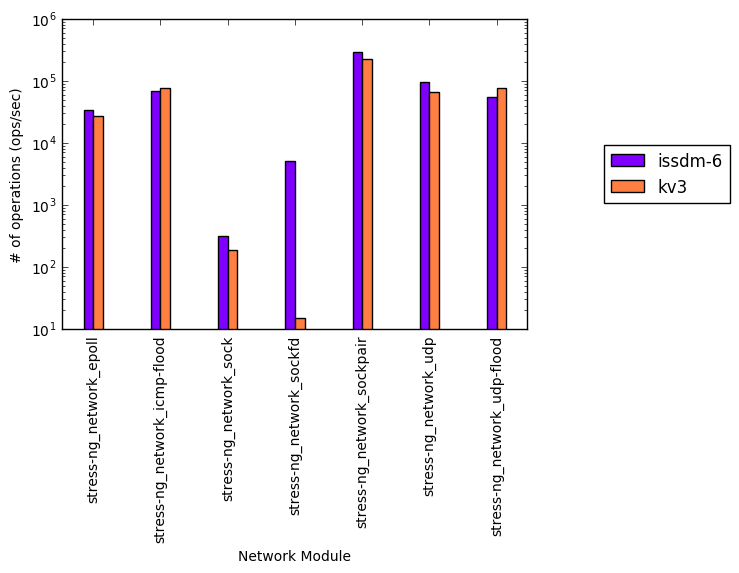

,benchmark,issdm-6,kv3
0,stress-ng_network_epoll,34191.232682,26651.436785
1,stress-ng_network_icmp-flood,69247.590019,76265.602000
2,stress-ng_network_sock,317.186932,185.435354
3,stress-ng_network_sockfd,5008.170525,15.056720
4,stress-ng_network_sockpair,296122.034353,225616.587904
5,stress-ng_network_udp,97556.862828,65371.957611
6,stress-ng_network_udp-flood,55434.241171,75767.186295


In [8]:
stress_ng_network = pd_res[pd_res['benchmark'].apply(lambda s: s.startswith('stress-ng_network'))]

# Recreate a new view with benchmarks with all machines
stress_ng_network_df = pd.DataFrame(data=stress_ng_network['benchmark'], columns=['benchmark'])
machines = stress_ng_network['machine'].unique()

for m in machines:
    stress_ng_network_df[m] = stress_ng_network[stress_ng_network['machine'] == m]['result']

stress_ng_network_df[BASE_MACHINE_NAME] = stress_ng_network[stress_ng_network['machine'] == machines[0]]['base_result']
stress_ng_network_df = stress_ng_network_df.reset_index(drop=True)

# start to draw figrue
all_machines = machines.tolist() + [BASE_MACHINE_NAME]
names = stress_ng_network_df['benchmark'].tolist()
values  = [stress_ng_network_df[m].tolist() for m in all_machines]
colors = cm.rainbow(np.linspace(0, 5, len(values[0])))

pos = np.arange(len(values[0]))
width = 1. / (5 + len(values))

bars = []
fig, ax = plt.subplots()
for idx, (v, color) in enumerate(zip(values, colors)):
    bars.append(ax.bar(left=pos + idx * width, height=v, width=width, color=color))

ax.legend([bars[i] for i in range(len(all_machines))], all_machines, loc='center', bbox_to_anchor=(1.3, 0.5))
ax.set_yscale('log')
ax.margins(.05, None)
ax.set_xticks(pos + width)
ax.set_xticklabels(names, rotation='vertical')

plt.xlabel('Network Module')
plt.ylabel('# of operations (ops/sec)')
plt.show()

stress_ng_network_df